In [44]:
import os
import cv2
import numpy as np
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Flatten,BatchNormalization
from tensorflow.keras.layers import Dense, MaxPooling2D,Conv2D
from tensorflow.keras.layers import Input,Activation,Add
from tensorflow.keras.models import Model
from tensorflow.keras.regularizers import l2
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ModelCheckpoint
from keras.models import Sequential,load_model,Model
from keras.layers import Conv2D,MaxPool2D,Dense,Dropout,BatchNormalization,Flatten,Input
import tensorflow as tf

import matplotlib.pyplot as plt

In [30]:
train_folder = 'train/'
test_folder ='test/'


In [35]:
def preprocess(dataset_folder):
    subfolders = os.listdir(dataset_folder)
    temp = subfolders    
    images = []
    last = []
    labels = []
    i = 0
    for subfolder in subfolders:
        sub_folder_index = temp.index(subfolder)
        label = sub_folder_index
        path = dataset_folder + '/'+subfolder
        sub_folder_images = os.listdir(path)

        for image in sub_folder_images:
            image_path = path + '/'+image
            image = cv2.imread(image_path)
            image = cv2.cvtColor(image , cv2.COLOR_BGR2GRAY)
            image = cv2.resize(image , (48 , 48))
            images.append(image)
            labels.append(label)
            i+=1
        last.append(i)

    images_x = np.array(images)
    labesl_y = np.array(labels)
    images_x = images_x/255
    
    num_of_classes = 7
    labels_y_encoded = tf.keras.utils.to_categorical(labesl_y,num_classes=num_of_classes)
    return images_x , labels_y_encoded

        
    
    

In [36]:
X_train , y_train = preprocess(train_folder)

In [37]:
X_test , y_test = preprocess(test_folder)

In [38]:
inputs = Input(shape=(48, 48, 1))

# Block 1
x = Conv2D(32, (3, 3), padding='same', strides=(1, 1), kernel_regularizer=l2(0.001))(inputs)
x = Activation('relu')(x)
x = Dropout(0.1)(x)
x = MaxPooling2D(pool_size=(2, 2))(x)

# Block 2
x = Conv2D(64, (3, 3), padding='same', strides=(1, 1), kernel_regularizer=l2(0.001))(x)
x = Activation('relu')(x)
x = Dropout(0.1)(x)
x = MaxPooling2D(pool_size=(2, 2))(x)

# Block 3
x = Conv2D(128, (3, 3), padding='same', strides=(1, 1), kernel_regularizer=l2(0.001))(x)
x = Activation('relu')(x)
x = Dropout(0.1)(x)
x = MaxPooling2D(pool_size=(2, 2))(x)

# Block 4
x = Conv2D(256, (3, 3), padding='same', strides=(1, 1), kernel_regularizer=l2(0.001))(x)
x = Activation('relu')(x)
x = Dropout(0.1)(x)
x = MaxPooling2D(pool_size=(2, 2))(x)

# Fully connected layers
x = Flatten()(x)
x = Dense(128, activation='relu')(x)
x = Dropout(0.2)(x)

# Output layer for 7 classes
outputs = Dense(7, activation='softmax')(x)


## using adam optimizer

In [39]:
model = Model(inputs = inputs , outputs = outputs)
model.compile(optimizer = "adam" , loss = ["categorical_crossentropy"] , metrics=["accuracy"])
model.summary()

Model: "model_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_6 (InputLayer)        [(None, 48, 48, 1)]       0         
                                                                 
 conv2d_17 (Conv2D)          (None, 48, 48, 32)        320       
                                                                 
 activation_16 (Activation)  (None, 48, 48, 32)        0         
                                                                 
 dropout_20 (Dropout)        (None, 48, 48, 32)        0         
                                                                 
 max_pooling2d_16 (MaxPooli  (None, 24, 24, 32)        0         
 ng2D)                                                           
                                                                 
 conv2d_18 (Conv2D)          (None, 24, 24, 64)        18496     
                                                           

In [40]:
file_s = 'emotion_model.h5'
checkpointer = ModelCheckpoint(
    file_s , 
    monitor='loss',
    verbose = 1,
    save_best_only=True,
    save_weights_only=False,
    mode = 'auto',
    save_freq='epoch'
)

callback_list = [checkpointer]

In [41]:
save = model.fit(X_train , y_train , batch_size=32 , validation_data=(X_test , y_test) , epochs = 50 , callbacks=[callback_list] )

Epoch 1/50


897/898 [============================>.] - ETA: 0s - loss: 1.8418 - accuracy: 0.2467
Epoch 1: loss improved from inf to 1.84173, saving model to emotion_model.h5
898/898 [==============================] - 83s 86ms/step - loss: 1.8417 - accuracy: 0.2466 - val_loss: 1.7979 - val_accuracy: 0.2510
Epoch 2/50


C:\Users\windows\anaconda3\Lib\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


897/898 [============================>.] - ETA: 0s - loss: 1.7333 - accuracy: 0.3036
Epoch 2: loss improved from 1.84173 to 1.73331, saving model to emotion_model.h5
898/898 [==============================] - 78s 87ms/step - loss: 1.7333 - accuracy: 0.3036 - val_loss: 1.6982 - val_accuracy: 0.3193
Epoch 3/50
897/898 [============================>.] - ETA: 0s - loss: 1.6098 - accuracy: 0.3788
Epoch 3: loss improved from 1.73331 to 1.60975, saving model to emotion_model.h5
898/898 [==============================] - 79s 88ms/step - loss: 1.6097 - accuracy: 0.3788 - val_loss: 1.5634 - val_accuracy: 0.4118
Epoch 4/50
897/898 [============================>.] - ETA: 0s - loss: 1.5509 - accuracy: 0.4112
Epoch 4: loss improved from 1.60975 to 1.55077, saving model to emotion_model.h5
898/898 [==============================] - 87s 96ms/step - loss: 1.5508 - accuracy: 0.4113 - val_loss: 1.5110 - val_accuracy: 0.4338
Epoch 5/50
897/898 [============================>.] - ETA: 0s - loss: 1.5126 - ac

898/898 [==============================] - 90s 100ms/step - loss: 1.2424 - accuracy: 0.5532 - val_loss: 1.2993 - val_accuracy: 0.5287
Epoch 29/50
897/898 [============================>.] - ETA: 0s - loss: 1.2383 - accuracy: 0.5582
Epoch 29: loss improved from 1.24241 to 1.23838, saving model to emotion_model.h5
898/898 [==============================] - 89s 99ms/step - loss: 1.2384 - accuracy: 0.5582 - val_loss: 1.3088 - val_accuracy: 0.5267
Epoch 30/50
897/898 [============================>.] - ETA: 0s - loss: 1.2353 - accuracy: 0.5594
Epoch 30: loss improved from 1.23838 to 1.23533, saving model to emotion_model.h5
898/898 [==============================] - 89s 99ms/step - loss: 1.2353 - accuracy: 0.5594 - val_loss: 1.2927 - val_accuracy: 0.5359
Epoch 31/50
897/898 [============================>.] - ETA: 0s - loss: 1.2282 - accuracy: 0.5616
Epoch 31: loss improved from 1.23533 to 1.22813, saving model to emotion_model.h5
898/898 [==============================] - 89s 99ms/step - loss

Text(0.5, 0.92, 'Lineplots showing loss and accuracy of CNN model by epochs')

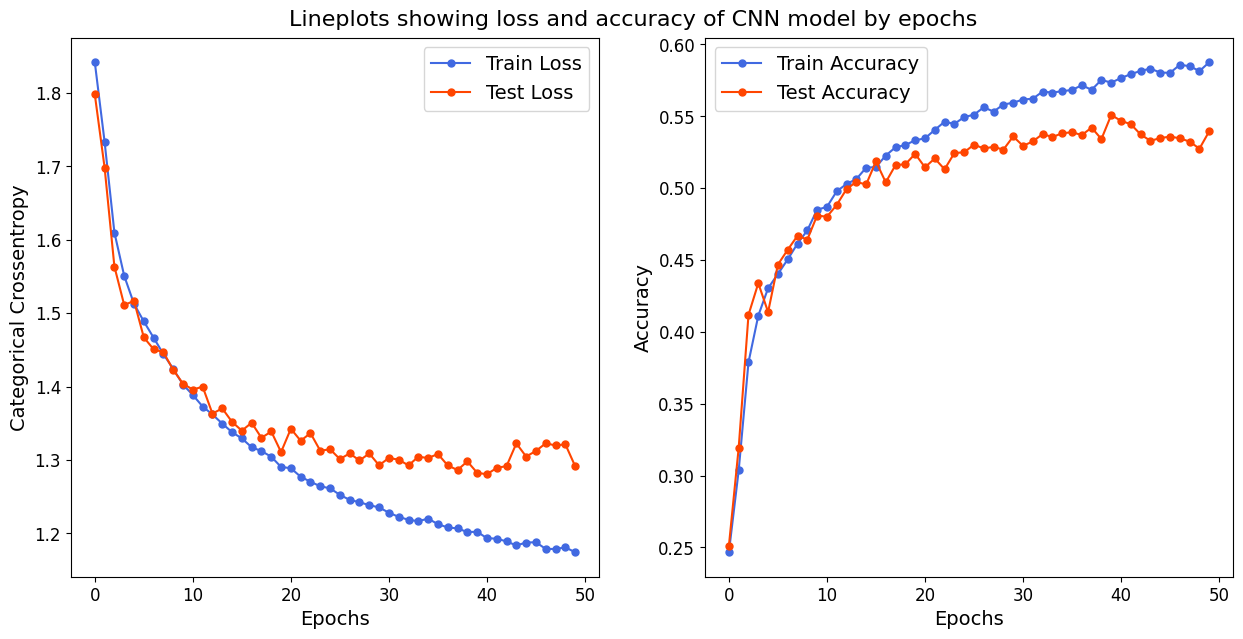

In [45]:
train_loss = save.history['loss']
test_loss = save.history['val_loss']
train_accuracy = save.history['accuracy']
test_accuracy = save.history['val_accuracy']

# Plotting a line chart to visualize the loss and accuracy values by epochs.
fig, ax = plt.subplots(ncols=2, figsize=(15,7))
ax = ax.ravel()
ax[0].plot(train_loss, label='Train Loss', color='royalblue', marker='o', markersize=5)
ax[0].plot(test_loss, label='Test Loss', color = 'orangered', marker='o', markersize=5)
ax[0].set_xlabel('Epochs', fontsize=14)
ax[0].set_ylabel('Categorical Crossentropy', fontsize=14)
ax[0].legend(fontsize=14)
ax[0].tick_params(axis='both', labelsize=12)
ax[1].plot(train_accuracy, label='Train Accuracy', color='royalblue', marker='o', markersize=5)
ax[1].plot(test_accuracy, label='Test Accuracy', color='orangered', marker='o', markersize=5)
ax[1].set_xlabel('Epochs', fontsize=14)
ax[1].set_ylabel('Accuracy', fontsize=14)
ax[1].legend(fontsize=14)
ax[1].tick_params(axis='both', labelsize=12)
fig.suptitle(x=0.5, y=0.92, t="Lineplots showing loss and accuracy of CNN model by epochs", fontsize=16)

In [52]:
file_s = 'emotion_model2.h5'
checkpointer = ModelCheckpoint(
    file_s , 
    monitor='loss',
    verbose = 1,
    save_best_only=True,
    save_weights_only=False,
    mode = 'auto',
    save_freq='epoch'
)

callback_list = [checkpointer]

In [53]:
save1 = model2.fit(X_train , y_train , batch_size=32 , validation_data=(X_test , y_test) , epochs = 50 , callbacks=[callback_list] )

Epoch 1/50
897/898 [============================>.] - ETA: 0s - loss: 1.1624 - accuracy: 0.5911
Epoch 1: loss improved from inf to 1.16238, saving model to emotion_model2.h5
898/898 [==============================] - 74s 81ms/step - loss: 1.1624 - accuracy: 0.5911 - val_loss: 1.3052 - val_accuracy: 0.5404
Epoch 2/50


C:\Users\windows\anaconda3\Lib\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


897/898 [============================>.] - ETA: 0s - loss: 1.1461 - accuracy: 0.5987
Epoch 2: loss improved from 1.16238 to 1.14611, saving model to emotion_model2.h5
898/898 [==============================] - 74s 82ms/step - loss: 1.1461 - accuracy: 0.5987 - val_loss: 1.3083 - val_accuracy: 0.5361
Epoch 3/50
897/898 [============================>.] - ETA: 0s - loss: 1.1399 - accuracy: 0.6009
Epoch 3: loss improved from 1.14611 to 1.13979, saving model to emotion_model2.h5
898/898 [==============================] - 71s 79ms/step - loss: 1.1398 - accuracy: 0.6009 - val_loss: 1.3056 - val_accuracy: 0.5407
Epoch 4/50
897/898 [============================>.] - ETA: 0s - loss: 1.1335 - accuracy: 0.6000
Epoch 4: loss improved from 1.13979 to 1.13351, saving model to emotion_model2.h5
898/898 [==============================] - 72s 80ms/step - loss: 1.1335 - accuracy: 0.6000 - val_loss: 1.3791 - val_accuracy: 0.5113
Epoch 5/50
897/898 [============================>.] - ETA: 0s - loss: 1.1245 -

898/898 [==============================] - 72s 80ms/step - loss: 1.1072 - accuracy: 0.6080 - val_loss: 1.2827 - val_accuracy: 0.5460
Epoch 30/50
897/898 [============================>.] - ETA: 0s - loss: 1.1076 - accuracy: 0.6090
Epoch 30: loss did not improve from 1.10301
898/898 [==============================] - 72s 80ms/step - loss: 1.1076 - accuracy: 0.6090 - val_loss: 1.3176 - val_accuracy: 0.5287
Epoch 31/50
897/898 [============================>.] - ETA: 0s - loss: 1.1032 - accuracy: 0.6121
Epoch 31: loss did not improve from 1.10301
898/898 [==============================] - 72s 80ms/step - loss: 1.1031 - accuracy: 0.6121 - val_loss: 1.3263 - val_accuracy: 0.5339
Epoch 32/50
897/898 [============================>.] - ETA: 0s - loss: 1.0995 - accuracy: 0.6106
Epoch 32: loss improved from 1.10301 to 1.09949, saving model to emotion_model2.h5
898/898 [==============================] - 71s 79ms/step - loss: 1.0995 - accuracy: 0.6106 - val_loss: 1.2912 - val_accuracy: 0.5485
Epoch 

Text(0.5, 0.92, 'Lineplots showing loss and accuracy of CNN model by epochs')

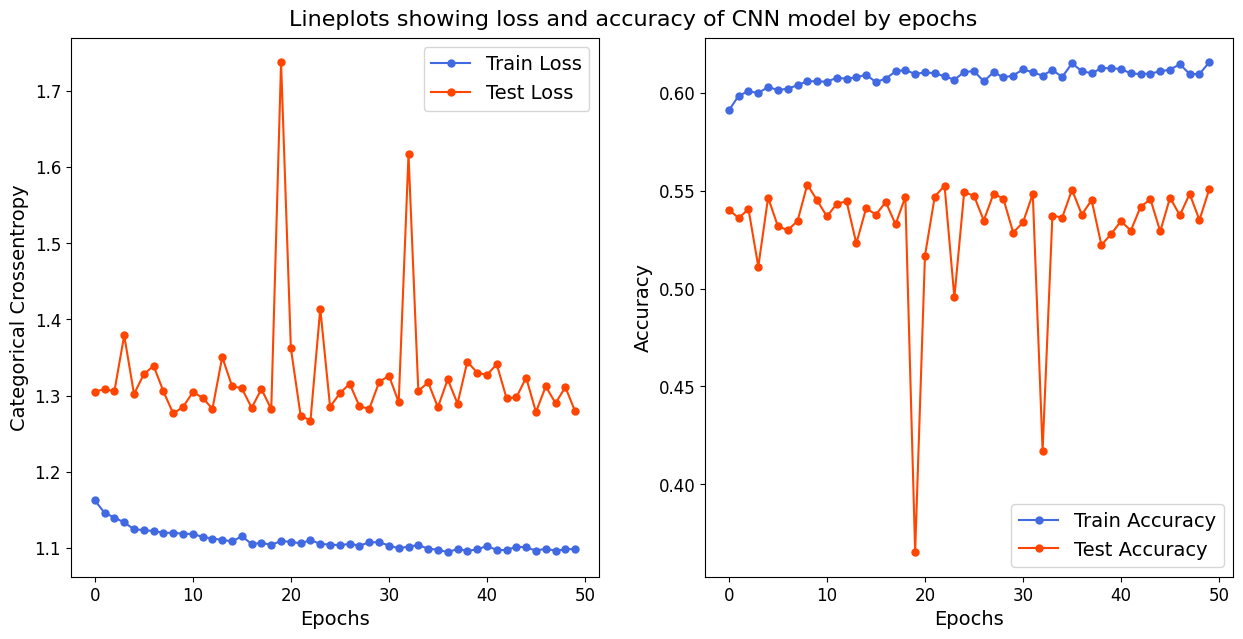

In [54]:
train_loss = save1.history['loss']
test_loss = save1.history['val_loss']
train_accuracy = save1.history['accuracy']
test_accuracy = save1.history['val_accuracy']

# Plotting a line chart to visualize the loss and accuracy values by epochs.
fig, ax = plt.subplots(ncols=2, figsize=(15,7))
ax = ax.ravel()
ax[0].plot(train_loss, label='Train Loss', color='royalblue', marker='o', markersize=5)
ax[0].plot(test_loss, label='Test Loss', color = 'orangered', marker='o', markersize=5)
ax[0].set_xlabel('Epochs', fontsize=14)
ax[0].set_ylabel('Categorical Crossentropy', fontsize=14)
ax[0].legend(fontsize=14)
ax[0].tick_params(axis='both', labelsize=12)
ax[1].plot(train_accuracy, label='Train Accuracy', color='royalblue', marker='o', markersize=5)
ax[1].plot(test_accuracy, label='Test Accuracy', color='orangered', marker='o', markersize=5)
ax[1].set_xlabel('Epochs', fontsize=14)
ax[1].set_ylabel('Accuracy', fontsize=14)
ax[1].legend(fontsize=14)
ax[1].tick_params(axis='both', labelsize=12)
fig.suptitle(x=0.5, y=0.92, t="Lineplots showing loss and accuracy of CNN model by epochs", fontsize=16)